# **PREREQUISITE SETUP**

### **Data Preparation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from google.colab import files

### Get Training Data

In [ ]:
# files.upload()

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


In [3]:
df_train.head(5)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


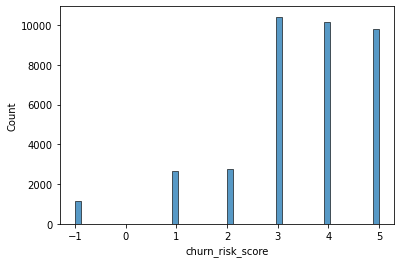

In [4]:
sns.histplot(x = 'churn_risk_score', data = df_train)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   19919 non-null  object 
 1   Name                          19919 non-null  object 
 2   age                           19919 non-null  int64  
 3   gender                        19919 non-null  object 
 4   security_no                   19919 non-null  object 
 5   region_category               16971 non-null  object 
 6   membership_category           19919 non-null  object 
 7   joining_date                  19919 non-null  object 
 8   joined_through_referral       19919 non-null  object 
 9   referral_id                   19919 non-null  object 
 10  preferred_offer_types         19760 non-null  object 
 11  medium_of_operation           19919 non-null  object 
 12  internet_option               19919 non-null  object 
 13  l

In [7]:
# buang row yang nilai churn_risk_score = -1
df_train_new = df_train[df_train['churn_risk_score']!=-1]


In [ ]:
# 1. Stage 1: understand the dataset given (27 Okt) – 1 week.
# 2. Stage 2: identify which activities should be done (3 Nov)– 1 week.
# 3. Stage 3: analyze the data using exploratory and visualization (12 Nov) – 1 week.
# 4. Stage 4: do the data pre-processing (17 Nov) – 3 weeks.
# 5. Stage 5: develop model which relevant with the problem (2 model minimal) along
# with the evaluation and recommendation (1 Des) – 2 weeks

# 2.identify which activities should be done (3 Nov)– 1 week.
#  - analyze the data using exploratory and visualization (12 Nov) – 1 week.
#   cek tipe kolom di dataframe apakah sudah sesuai 
#   ubah tipe data kolom yg tidak sesuai
#   e.g. : 
#     joining_date -> split jadi year, month, date
#     last_visit_time -> split jam saja
#     avg_frequency_login_days -> menjadi tipe float64
#   cek kolom2 mana yg bernilai null
#   ubah kategorikal variable menjadi dummies variable
#   cek nilai korelasi antar kolom

# 3: analyze the data using exploratory and visualization (12 Nov) – 1 week.
#  - do the data pre-processing (17 Nov) – 3 weeks.
#  - develop model which relevant with the problem (2 model minimal) along

In [8]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   35829 non-null  object 
 1   Name                          35829 non-null  object 
 2   age                           35829 non-null  int64  
 3   gender                        35829 non-null  object 
 4   security_no                   35829 non-null  object 
 5   region_category               30566 non-null  object 
 6   membership_category           35829 non-null  object 
 7   joining_date                  35829 non-null  object 
 8   joined_through_referral       35829 non-null  object 
 9   referral_id                   35829 non-null  object 
 10  preferred_offer_types         35553 non-null  object 
 11  medium_of_operation           35829 non-null  object 
 12  internet_option               35829 non-null  object 
 13  l

# **EXPLORATORY DATA ANALYSIS**

## **Average Frequency Login Days**

### **Change the 'Error' value into NaN for Average Frequency Login Days feature**

In [9]:
df_train_new[df_train_new['avg_frequency_login_days']=='Error'].head(5)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
39,fffe43004900440034003100390036003500,Desire Rieder,49,F,M9F3TE2,Village,Platinum Membership,2017-06-09,Yes,CID18445,Credit/Debit Card Offers,Both,Fiber_Optic,23:11:17,8,706.36,19062.25,Error,780.58,Yes,No,No,Not Applicable,Poor Product Quality,3
44,fffe4300490044003900300031003500,Pam Seigler,36,M,C7QZITU,Village,Silver Membership,2016-11-28,Yes,CID33962,Gift Vouchers/Coupons,?,Mobile_Data,06:06:05,2,691.09,17989.46,Error,NaN,No,Yes,Yes,Solved,No reason specified,4
45,fffe43004900440033003000360031003100,Lore Yarber,12,M,B1XF70C,City,Premium Membership,2017-02-13,No,xxxxxxxx,Without Offers,Desktop,Mobile_Data,22:27:40,8,33.09,55607.35,Error,NaN,Yes,No,No,Not Applicable,User Friendly Website,1
48,fffe43004900440032003800320037003300,Glendora Borel,30,M,TER02YR,City,Platinum Membership,2015-12-11,?,CID4129,Gift Vouchers/Coupons,Smartphone,Wi-Fi,14:13:01,20,100.42,86433.91,Error,719.93,No,Yes,Yes,Unsolved,Reasonable Price,2
61,fffe43004900440035003200330039003300,Nan Buzbee,44,F,YN0D4XB,NaN,No Membership,2016-08-23,Yes,CID35687,Without Offers,Both,Wi-Fi,22:22:17,13,283.49,7603.71,Error,553.45,Yes,Yes,Yes,Unsolved,No reason specified,5


In [10]:
df_test[df_test['avg_frequency_login_days']=='Error'].head(5)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
9,fffe4300490044003500320033003500,Franklin Lurry,22,M,C3B77NU,Town,No Membership,2015-10-14,Yes,CID60228,Credit/Debit Card Offers,Desktop,Fiber_Optic,10:44:01,4,30.25,19363.60,Error,528.660000,Yes,No,No,Not Applicable,Poor Website
16,fffe43004900440035003700380032003700,Elke Yann,55,F,4KPKRVX,Town,Basic Membership,2015-12-11,No,xxxxxxxx,Without Offers,Desktop,Mobile_Data,21:50:16,10,462.31,30773.81,Error,520.360000,No,Yes,No,Not Applicable,Too many ads
23,fffe43004900440033003600370032003800,Giselle Hutton,61,F,0P10NS8,Village,Premium Membership,2017-04-12,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,Wi-Fi,03:35:05,7,214.17,3371.20,Error,1030.074512,No,Yes,Yes,Solved in Follow-up,Too many ads
57,fffe43004900440034003200390031003500,Rosia Clubb,21,F,YMNLL4S,NaN,Premium Membership,2015-07-14,Yes,CID6694,Credit/Debit Card Offers,Smartphone,Mobile_Data,23:25:00,20,34.79,27151.66,Error,789.750000,Yes,No,No,Not Applicable,Poor Product Quality
64,fffe43004900440034003000350038003900,Cami Mattison,40,F,OSBDPHC,NaN,No Membership,2015-09-16,?,CID700,Without Offers,Smartphone,Wi-Fi,08:58:38,23,31.40,11658.20,Error,623.210000,No,Yes,No,Not Applicable,Poor Website


In [11]:
#JUMLAH ERROR
df_train_new[df_train_new['avg_frequency_login_days']=='Error'].shape

(3419, 25)

In [12]:
#JUMLAH ERROR
df_test[df_test['avg_frequency_login_days']=='Error'].shape

(1915, 24)

**Replace Error menggunakan NaN**

In [13]:
df_train_new['avg_frequency_login_days'].replace(['Error'], np.nan, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [14]:
df_test['avg_frequency_login_days'].replace(['Error'], np.nan, inplace = True)

In [15]:
df_train_new['avg_frequency_login_days'].isna().sum()

3419

In [16]:
df_test['avg_frequency_login_days'].isna().sum()

1915

In [17]:
df_train_new['avg_frequency_login_days'].astype(float)

0        17.0
1        10.0
2        22.0
3         6.0
4        16.0
         ... 
36987     6.0
36988    28.0
36989     NaN
36990    20.0
36991     NaN
Name: avg_frequency_login_days, Length: 35829, dtype: float64

In [18]:
df_test['avg_frequency_login_days'].astype(float)

0         7.0
1         9.0
2        21.0
3        11.0
4         8.0
         ... 
19914    18.0
19915     NaN
19916    24.0
19917    22.0
19918     NaN
Name: avg_frequency_login_days, Length: 19919, dtype: float64

### **Change the Data Type into Float for Average Frequency Login Days feature**

In [19]:
df_train_new['avg_frequency_login_days'] = df_train_new['avg_frequency_login_days'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_test['avg_frequency_login_days'] = df_test['avg_frequency_login_days'].astype(float)

In [21]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   35829 non-null  object 
 1   Name                          35829 non-null  object 
 2   age                           35829 non-null  int64  
 3   gender                        35829 non-null  object 
 4   security_no                   35829 non-null  object 
 5   region_category               30566 non-null  object 
 6   membership_category           35829 non-null  object 
 7   joining_date                  35829 non-null  object 
 8   joined_through_referral       35829 non-null  object 
 9   referral_id                   35829 non-null  object 
 10  preferred_offer_types         35553 non-null  object 
 11  medium_of_operation           35829 non-null  object 
 12  internet_option               35829 non-null  object 
 13  l

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   19919 non-null  object 
 1   Name                          19919 non-null  object 
 2   age                           19919 non-null  int64  
 3   gender                        19919 non-null  object 
 4   security_no                   19919 non-null  object 
 5   region_category               16971 non-null  object 
 6   membership_category           19919 non-null  object 
 7   joining_date                  19919 non-null  object 
 8   joined_through_referral       19919 non-null  object 
 9   referral_id                   19919 non-null  object 
 10  preferred_offer_types         19760 non-null  object 
 11  medium_of_operation           19919 non-null  object 
 12  internet_option               19919 non-null  object 
 13  l

In [23]:
df_train_new[df_train_new['avg_frequency_login_days']==np.nan].value_counts().sum()

0

In [24]:
df_test[df_test['avg_frequency_login_days']==np.nan].value_counts().sum()

0

## **Joining Date**

### **Change the joining date feature data type into datetime64**

In [25]:
df_train_new[['joining_date']].head()

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12


In [26]:
df_train_new['joining_date']=pd.to_datetime(df_train_new['joining_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_test['joining_date']=pd.to_datetime(df_test['joining_date'])

In [28]:
df_train_new['joining_date'].dtype

dtype('<M8[ns]')

In [29]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   35829 non-null  object        
 1   Name                          35829 non-null  object        
 2   age                           35829 non-null  int64         
 3   gender                        35829 non-null  object        
 4   security_no                   35829 non-null  object        
 5   region_category               30566 non-null  object        
 6   membership_category           35829 non-null  object        
 7   joining_date                  35829 non-null  datetime64[ns]
 8   joined_through_referral       35829 non-null  object        
 9   referral_id                   35829 non-null  object        
 10  preferred_offer_types         35553 non-null  object        
 11  medium_of_operation         

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   19919 non-null  object        
 1   Name                          19919 non-null  object        
 2   age                           19919 non-null  int64         
 3   gender                        19919 non-null  object        
 4   security_no                   19919 non-null  object        
 5   region_category               16971 non-null  object        
 6   membership_category           19919 non-null  object        
 7   joining_date                  19919 non-null  datetime64[ns]
 8   joined_through_referral       19919 non-null  object        
 9   referral_id                   19919 non-null  object        
 10  preferred_offer_types         19760 non-null  object        
 11  medium_of_operation         

## **Data Visualization**

### **Separating the Categoric and Numeric feature**

In [31]:
df_train_new['joining_date'].dtype

dtype('<M8[ns]')

In [32]:
data_numerik = []
data_datetime = []
data_kategorik = []

def split_column_type(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    datetime_features = df.select_dtypes(include = [np.datetime64])
    return numerical_features, categorical_features, datetime_features

In [33]:
# kolom = df_train_new.columns
data_numerik, data_kategorik, data_datetime = split_column_type(df_train_new)
print('Data Numerik    : \n', data_numerik,'\n')
print('Data Waktu      : \n', data_datetime, '\n')
print('Data Kategorik  : \n', data_kategorik, '\n')

Data Numerik    : 
        age  days_since_last_login  ...  points_in_wallet  churn_risk_score
0       18                     17  ...        781.750000                 2
1       32                     16  ...               NaN                 1
2       44                     14  ...        500.690000                 5
3       37                     11  ...        567.660000                 5
4       31                     20  ...        663.060000                 5
...    ...                    ...  ...               ...               ...
36987   46                      2  ...        639.510000                 4
36988   29                     13  ...        527.990000                 5
36989   23                     12  ...        680.470000                 4
36990   53                     15  ...        197.264414                 3
36991   35                     15  ...        719.970000                 2

[35829 rows x 7 columns] 

Data Waktu      : 
       joining_date
0       2017-

In [34]:
# kolom = df_train_new.columns
data_numerik, data_kategorik, data_datetime = split_column_type(df_test)
print('Data Numerik    : \n', data_numerik,'\n')
print('Data Waktu      : \n', data_datetime, '\n')
print('Data Kategorik  : \n', data_kategorik, '\n')

Data Numerik    : 
        age  days_since_last_login  ...  avg_frequency_login_days  points_in_wallet
0       50                     12  ...                       7.0        733.830000
1       41                     11  ...                       9.0        726.000000
2       31                     18  ...                      21.0        713.780000
3       64                   -999  ...                      11.0        744.970000
4       16                      6  ...                       8.0        299.048351
...    ...                    ...  ...                       ...               ...
19914   12                     16  ...                      18.0        708.120000
19915   40                     21  ...                       NaN        574.340000
19916   55                     18  ...                      24.0        564.300000
19917   17                      3  ...                      22.0        606.340000
19918   20                      8  ...                       NaN   

### **Distplot for Numeric feature**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

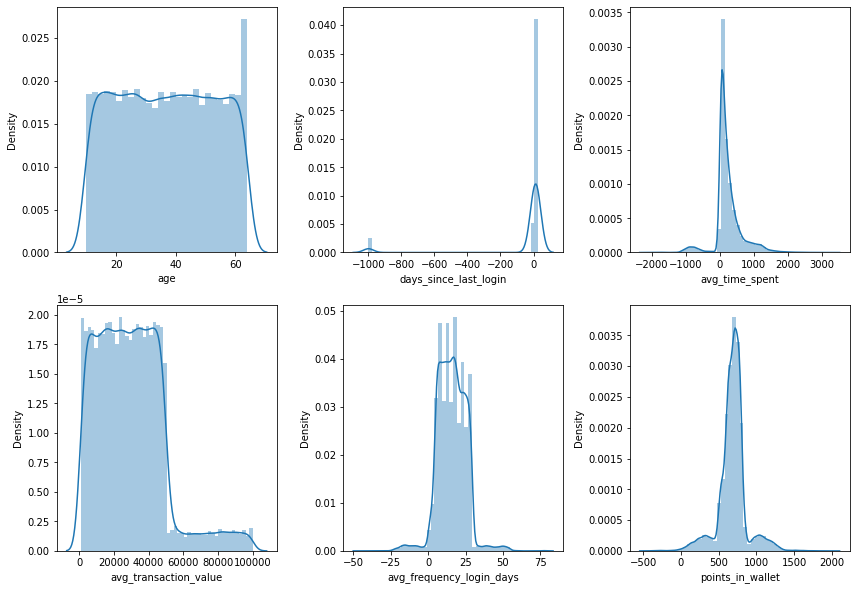

In [35]:
fig = plt.figure(figsize=(12,12))
for i in range(len(data_numerik.columns)):
    fig.add_subplot(3,3,i+1)
    sns.distplot(data_numerik.iloc[:,i])
plt.tight_layout()
plt.show()

### **Boxplot for Numeric feature**

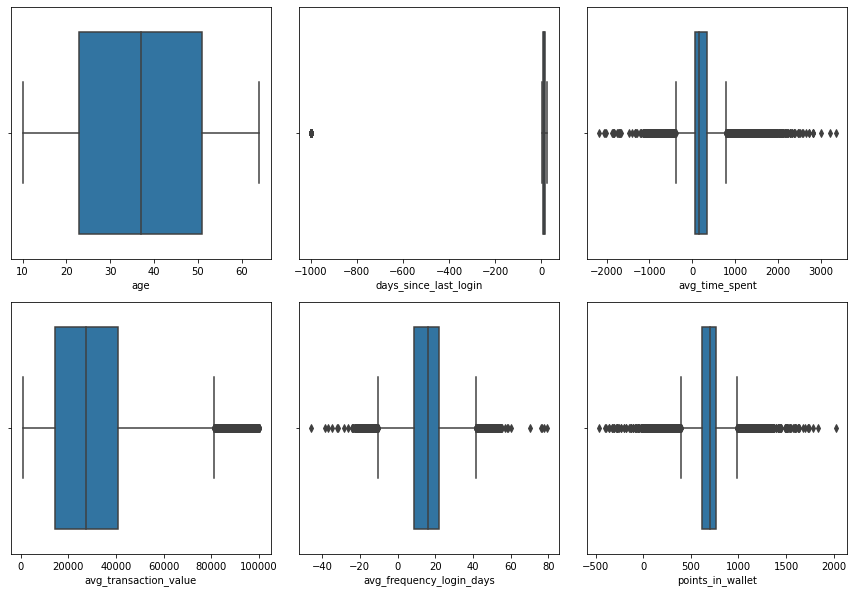

In [36]:
fig = plt.figure(figsize=(12,12))
for i in range(len(data_numerik.columns)):
    fig.add_subplot(3,3,i+1)
    sns.boxplot(x = data_numerik.iloc[:,i])
plt.tight_layout()
plt.show()

### **Barplot for Categoric feature**

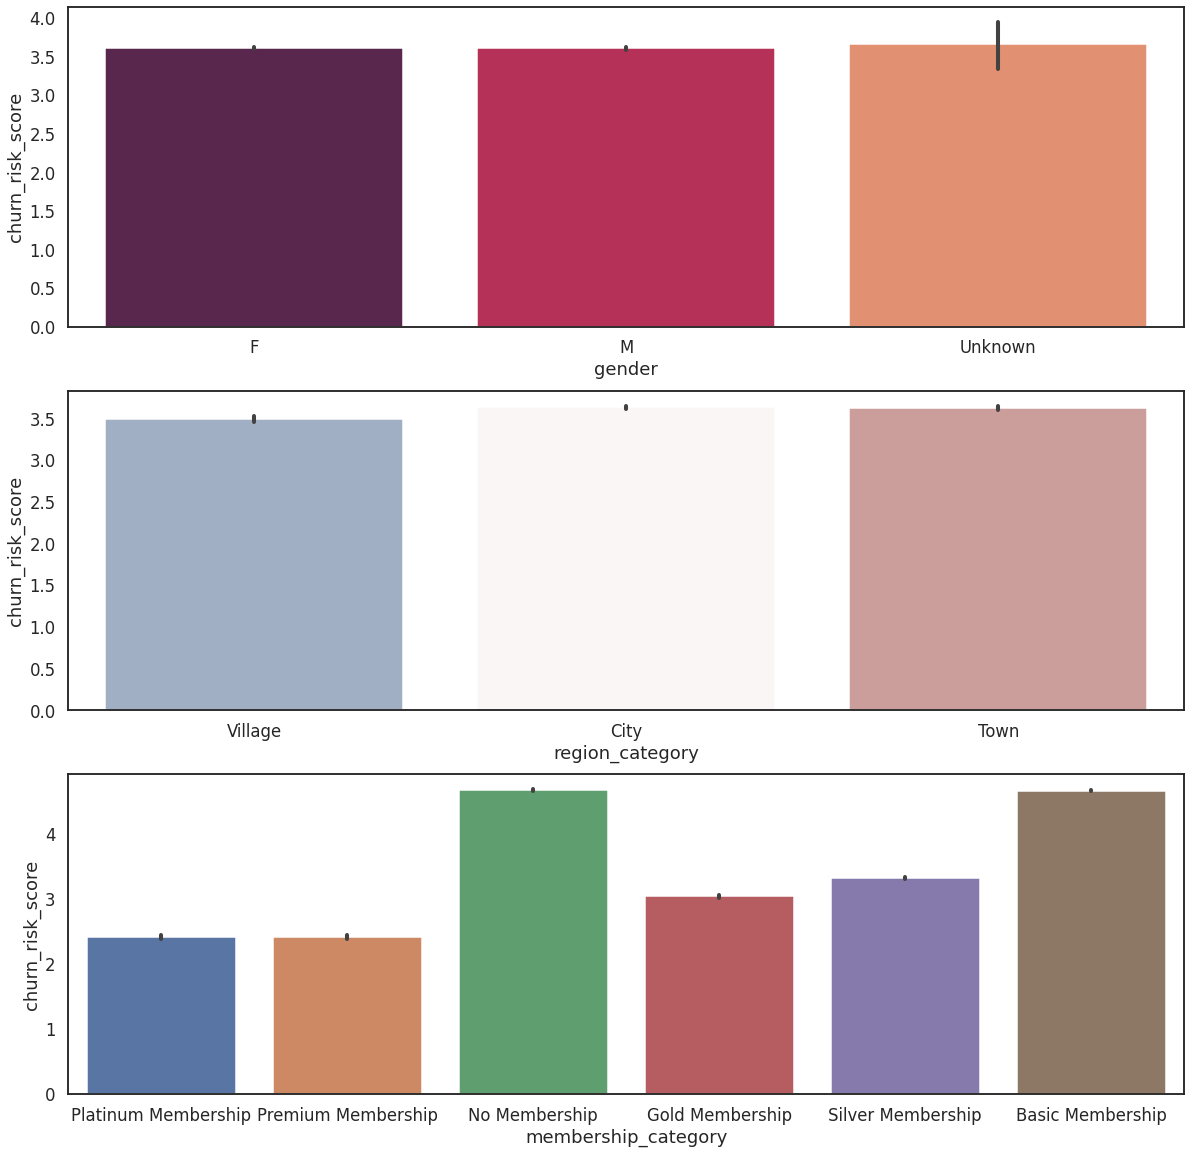

In [37]:
targetFeature = 'churn_risk_score'
sns.set_theme(style="white", context="talk")
f,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(20,20))
sns.barplot(x = 'gender',y =targetFeature,palette="rocket",ax=ax1,data=df_train_new)
sns.barplot(x = 'region_category',y =targetFeature,palette="vlag",ax=ax2,data=df_train_new)
sns.barplot(x = 'membership_category',y =targetFeature,palette="deep",ax=ax3,data=df_train_new)

### **Correlation for data Numeric feature**

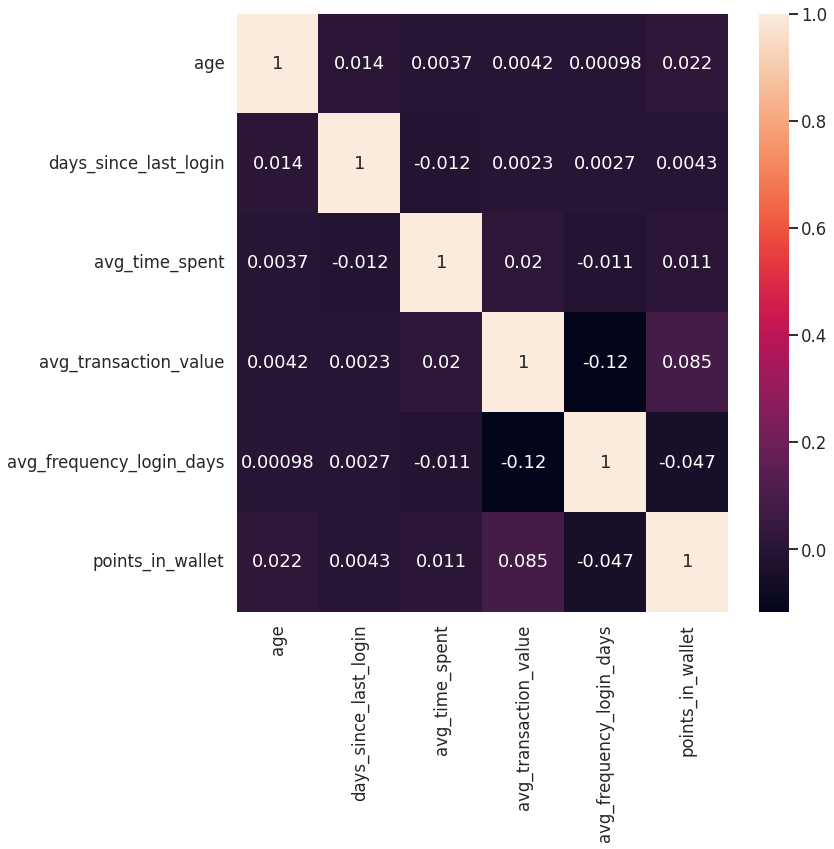

In [38]:
data_corr_temp = data_numerik.corr()
plt.figure(figsize = (11,11))
sns.heatmap(data_corr_temp,annot=True)
plt.show()

# **FEATURE ENGINEERING**

In [ ]:
df_train_new.shape

(35829, 25)

## **Joining Date, Days Counting**

In [39]:
from datetime import date
today_date = pd.to_datetime(date.today())
print(today_date)

2021-12-22 00:00:00


In [40]:
# df_train_new['joining_date'].max()

In [41]:
df_train_new['last_join_date'] = today_date
df_train_new['last_join_date'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0   2021-12-22
1   2021-12-22
2   2021-12-22
3   2021-12-22
4   2021-12-22
Name: last_join_date, dtype: datetime64[ns]

In [42]:
df_test['last_join_date'] = today_date

In [43]:
df_train_new['joining_days'] = (df_train_new['last_join_date'] - df_train_new['joining_date']).dt.days
df_train_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,last_join_date,joining_days
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,2021-12-22,1588
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1,2021-12-22,1577
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,2021-12-22,1867
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,2021-12-22,1880
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5,2021-12-22,1562


In [44]:
df_test['joining_days'] = (df_test['last_join_date'] - df_test['joining_date']).dt.days
df_test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,last_join_date,joining_days
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,07:19:30,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality,2021-12-22,2242
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,Without Offers,Desktop,Fiber_Optic,22:21:16,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website,2021-12-22,2122
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,Gift Vouchers/Coupons,Both,Mobile_Data,16:40:39,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified,2021-12-22,1755
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,Credit/Debit Card Offers,?,Fiber_Optic,14:56:17,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads,2021-12-22,1587
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,Without Offers,Smartphone,Mobile_Data,02:57:53,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website,2021-12-22,2423


In [45]:
df_train_new['joining_days'].dtype

dtype('int64')

In [46]:
df_test['joining_days'].dtype

dtype('int64')

In [47]:
df_train_new.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,joining_days
count,35829.000000,35829.000000,35829.000000,35829.000000,32410.000000,32488.000000,35829.000000,35829.000000
mean,37.120266,-42.143906,243.373859,29304.272306,15.963040,686.849231,3.608278,1996.496302
std,15.865360,229.254856,397.784650,19484.565419,9.205918,194.574486,1.176426,317.872079
min,10.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,1.000000,1452.000000
25%,23.000000,8.000000,59.810000,14194.650000,9.000000,615.967500,3.000000,1720.000000
50%,37.000000,12.000000,161.620000,27584.530000,16.000000,697.820000,4.000000,1995.000000
75%,51.000000,16.000000,356.330000,40874.010000,23.000000,764.002500,5.000000,2274.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000,2547.000000


## **Days Since Last Login, Negative Drop(canceled)**

In [48]:
df_train_new[df_train_new['days_since_last_login']<0].value_counts().sum()

1360

In [49]:
df_test[df_test['days_since_last_login']<0].value_counts().sum()

701

In [50]:
df_test[df_test['days_since_last_login']==-999].value_counts().sum()

701

In [51]:
# skip tidak jadi didrop
# df_train_new.drop(df_train_new[df_train_new['days_since_last_login'] < 0].index, inplace = True)

In [52]:
df_train_new[df_train_new['days_since_last_login']<0].value_counts().sum()

1360

## **Average Time Spent, Negative Drop**

In [53]:
df_train_new[df_train_new['avg_time_spent']<0].value_counts().sum()

1151

In [54]:
# skip tdk jadi didrop
# df_train_new.drop(df_train_new[df_train_new['avg_time_spent'] < 0].index, inplace = True)

In [55]:
df_train_new[df_train_new['avg_time_spent']<0].value_counts().sum()

1151

## **Average Frequency Login Days, Negative Drop**

In [56]:
df_train_new[df_train_new['avg_frequency_login_days']<0].value_counts().sum()

502

In [57]:
# tidak jadi di drop
# df_train_new.drop(df_train_new[df_train_new['avg_frequency_login_days'] < 0].index, inplace = True)

In [58]:
df_train_new[df_train_new['avg_frequency_login_days']<0].value_counts().sum()

502

## **Points in Wallet, Negative Drop**

In [59]:
df_train_new[df_train_new['points_in_wallet']<0].value_counts().sum()

106

In [60]:
# tidak jadi di drop
# df_train_new.drop(df_train_new[df_train_new['points_in_wallet'] < 0].index, inplace = True)

In [61]:
df_train_new[df_train_new['points_in_wallet']<0].value_counts().sum()

106

In [62]:
df_train_new.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,joining_days
count,35829.000000,35829.000000,35829.000000,35829.000000,32410.000000,32488.000000,35829.000000,35829.000000
mean,37.120266,-42.143906,243.373859,29304.272306,15.963040,686.849231,3.608278,1996.496302
std,15.865360,229.254856,397.784650,19484.565419,9.205918,194.574486,1.176426,317.872079
min,10.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,1.000000,1452.000000
25%,23.000000,8.000000,59.810000,14194.650000,9.000000,615.967500,3.000000,1720.000000
50%,37.000000,12.000000,161.620000,27584.530000,16.000000,697.820000,4.000000,1995.000000
75%,51.000000,16.000000,356.330000,40874.010000,23.000000,764.002500,5.000000,2274.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000,2547.000000


## **Overall Numeric Checking I**

In [63]:
data_numerik = []
data_datetime = []
data_kategorik = []

def split_column_type(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    datetime_features = df.select_dtypes(include = [np.datetime64])
    return numerical_features, categorical_features, datetime_features

In [64]:
data_numerik, data_kategorik, data_datetime = split_column_type(df_train_new)
# print('Data Numerik    : \n', data_numerik,'\n')
# print('Data Waktu      : \n', data_datetime, '\n')
# print('Data Kategorik  : \n', data_kategorik, '\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

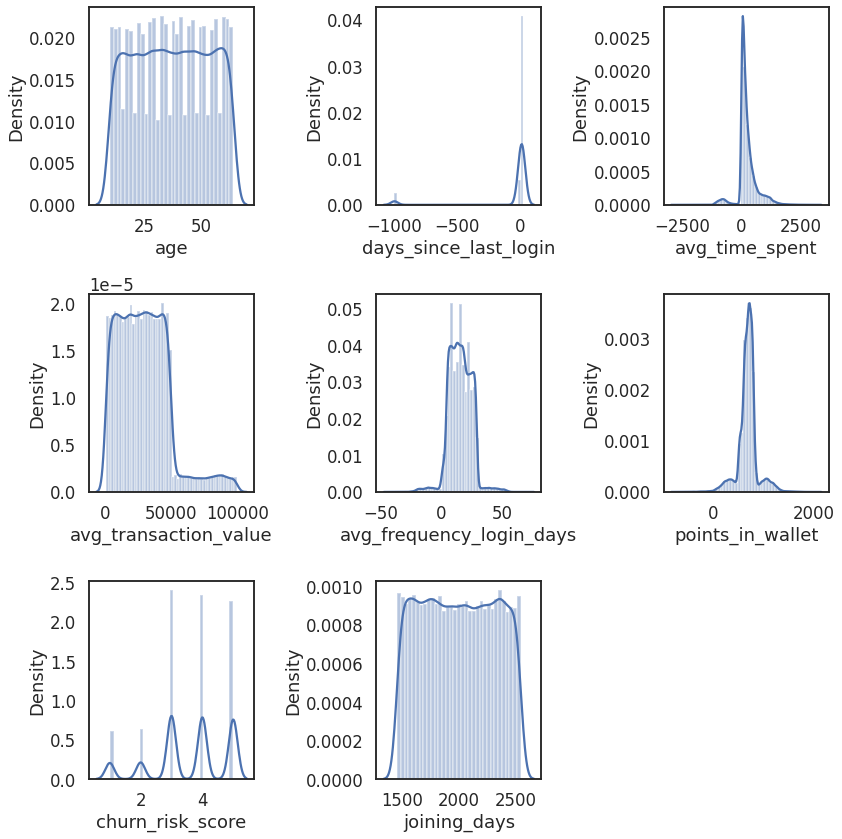

In [65]:
fig = plt.figure(figsize=(12,12))
for i in range(len(data_numerik.columns)):
    fig.add_subplot(3,3,i+1)
    sns.distplot(data_numerik.iloc[:,i])
plt.tight_layout()
plt.show()

In [66]:
df_train_new.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5263
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            276
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days        3419
points_in_wallet                3341
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
last_join_date                     0
joining_days                       0
d

In [67]:
df_test.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 2948
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            159
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days        1915
points_in_wallet                1963
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
last_join_date                     0
joining_days                       0
dtype: int64

## **Average Frequency Login Days, Null Filling = Median**

In [68]:
df_train_new['avg_frequency_login_days'].fillna(df_train_new['avg_frequency_login_days'].median(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [69]:
df_test['avg_frequency_login_days'].fillna(df_train_new['avg_frequency_login_days'].median(), inplace = True)

In [70]:
df_train_new['avg_frequency_login_days'].isna().sum()

0

In [71]:
df_test['avg_frequency_login_days'].isna().sum()

0

## **Points in Wallet, Null Filling = Median**

In [72]:
df_train_new['points_in_wallet'].fillna(df_train_new['points_in_wallet'].median(), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [73]:
df_test['points_in_wallet'].fillna(df_train_new['points_in_wallet'].median(), inplace = True)

In [74]:
df_train_new['points_in_wallet'].isna().sum()

0

In [75]:
df_train_new.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5263
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            276
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
last_join_date                     0
joining_days                       0
d

In [76]:
df_test.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 2948
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            159
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
last_join_date                     0
joining_days                       0
dtype: int64

## **Overall Numeric Checking II**

In [77]:
data_numerik = []
data_datetime = []
data_kategorik = []

def split_column_type(df):
    numerical_features = df.select_dtypes(include=[np.number])
    categorical_features = df.select_dtypes(include=[np.object])
    datetime_features = df.select_dtypes(include = [np.datetime64])
    return numerical_features, categorical_features, datetime_features

In [78]:
data_numerik, data_kategorik, data_datetime = split_column_type(df_train_new)
# print('Data Numerik    : \n', data_numerik,'\n')
# print('Data Waktu      : \n', data_datetime, '\n')
# print('Data Kategorik  : \n', data_kategorik, '\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

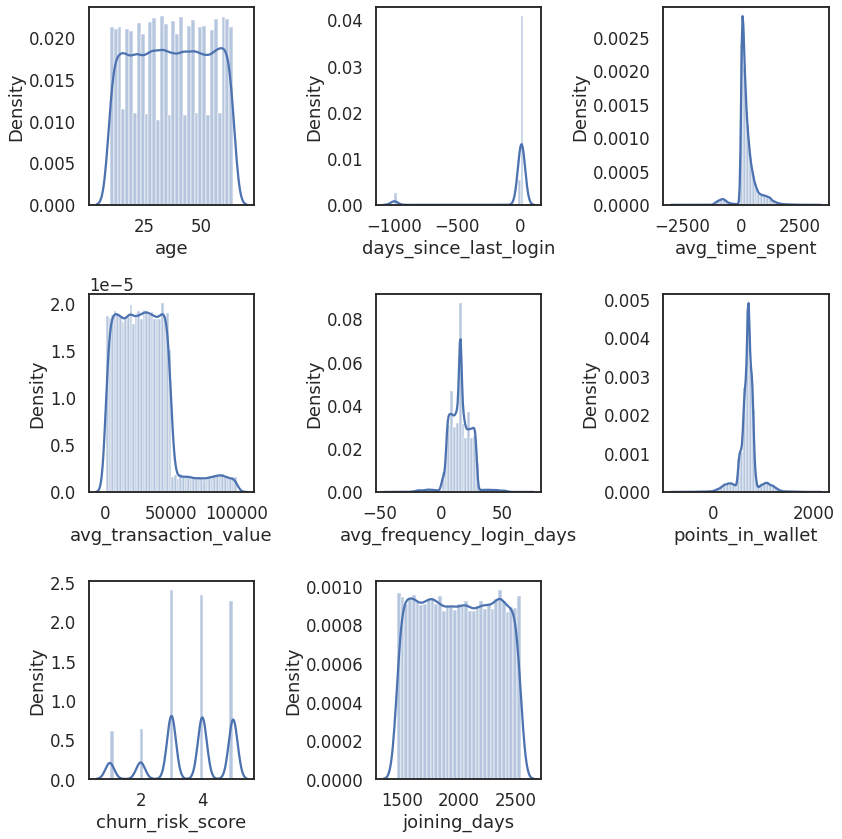

In [79]:
fig = plt.figure(figsize=(12,12))
for i in range(len(data_numerik.columns)):
    fig.add_subplot(3,3,i+1)
    sns.distplot(data_numerik.iloc[:,i])
plt.tight_layout()
plt.show()

## **Region Category and Preferred Offer Types, Drop Null**

In [80]:
df_train_new.isna().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5263
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            276
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
last_join_date                     0
joining_days                       0
d

In [81]:
# df_train_new.dropna(how = 'any', inplace = True)
df_train_new['region_category'].fillna("Unknown", inplace = True)
df_train_new['preferred_offer_types'].fillna("Unknown", inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [82]:
df_train_new.isna().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
last_join_date                  0
joining_days                    0
dtype: int64

In [83]:
df_test['region_category'].fillna("Unknown", inplace = True)
df_test['preferred_offer_types'].fillna("Unknown", inplace = True)

In [84]:
df_test.isna().sum()

customer_id                     0
Name                            0
age                             0
gender                          0
security_no                     0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
referral_id                     0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
last_join_date                  0
joining_days                    0
dtype: int64

In [85]:
df_train_new.shape

(35829, 27)

In [86]:
df_test.shape

(19919, 26)

In [87]:
df_train_new.head(1)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,last_join_date,joining_days
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,2021-12-22,1588


## **Dropping the Unused Columns**

In [88]:
df_train_new.drop(['customer_id','Name', 'security_no', 'joining_date', 'referral_id', 'last_visit_time', 'last_join_date'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [89]:
df_test.drop(['customer_id','Name', 'security_no', 'joining_date', 'referral_id', 'last_visit_time', 'last_join_date'], axis=1, inplace=True)

In [90]:
df_train_new.head(1)

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_days
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,1588


## **Feedback Label Encoding**

In [91]:
dict1 = {'Products always in Stock': 1,'Quality Customer Care':1, 'User Friendly Website':1, 'Reasonable Price':1, 
        'Poor Website':0, 'No reason specified':0,'Poor Product Quality':0, 'Poor Customer Service':0, 'Too many ads':0
        }

In [92]:
df_train_new['feedback'].replace(dict1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [93]:
df_train_new

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_days
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,1,2,1588
1,32,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.340000,12838.38,10.0,697.820000,Yes,No,Yes,Solved,1,1,1577
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,0,5,1867
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,0,5,1880
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,0,5,1562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,Unknown,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,2,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,0,4,1553
36988,29,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,13,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,0,5,2004
36989,23,F,Unknown,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,12,154.940000,38127.56,16.0,680.470000,No,Yes,Yes,Unsolved,0,4,1928
36990,53,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,0,3,1651


In [94]:
df_test['feedback'].replace(dict1, inplace=True)

In [95]:
df_train_new = pd.get_dummies(df_train_new)

In [96]:
df_test = pd.get_dummies(df_test)

In [97]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 47 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             35829 non-null  int64  
 1   days_since_last_login                           35829 non-null  int64  
 2   avg_time_spent                                  35829 non-null  float64
 3   avg_transaction_value                           35829 non-null  float64
 4   avg_frequency_login_days                        35829 non-null  float64
 5   points_in_wallet                                35829 non-null  float64
 6   feedback                                        35829 non-null  int64  
 7   churn_risk_score                                35829 non-null  int64  
 8   joining_days                                    35829 non-null  int64  
 9   gender_F                               

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 46 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   age                                             19919 non-null  int64  
 1   days_since_last_login                           19919 non-null  int64  
 2   avg_time_spent                                  19919 non-null  float64
 3   avg_transaction_value                           19919 non-null  float64
 4   avg_frequency_login_days                        19919 non-null  float64
 5   points_in_wallet                                19919 non-null  float64
 6   feedback                                        19919 non-null  int64  
 7   joining_days                                    19919 non-null  int64  
 8   gender_F                                        19919 non-null  uint8  
 9   gender_M                               

In [99]:
df_train_new.head(2)

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,feedback,churn_risk_score,joining_days,gender_F,gender_M,gender_Unknown,region_category_City,region_category_Town,region_category_Unknown,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_?,joined_through_referral_No,joined_through_referral_Yes,preferred_offer_types_Credit/Debit Card Offers,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Unknown,preferred_offer_types_Without Offers,medium_of_operation_?,medium_of_operation_Both,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Fiber_Optic,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_No,used_special_discount_Yes,offer_application_preference_No,offer_application_preference_Yes,past_complaint_No,past_complaint_Yes,complaint_status_No Information Available,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved
0,18,17,300.63,53005.25,17.0,781.75,1,2,1588,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0
1,32,16,306.34,12838.38,10.0,697.82,1,1,1577,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0


## **Using SMOTE to Balancing Data for each Class**

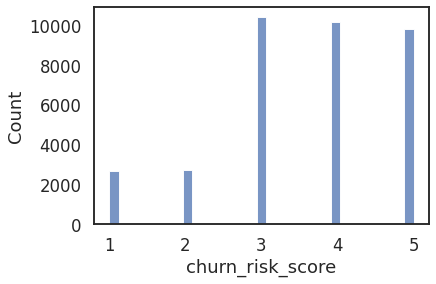

In [100]:
sns.histplot(x = 'churn_risk_score', data = df_train_new)

In [101]:
X = df_train_new.drop(['churn_risk_score'],axis=1).values
Y = df_train_new['churn_risk_score'].values

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,train_size=0.8)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(28663, 46) (28663,)
(7166, 46) (7166,)


In [116]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_over,Y_over = smote.fit_resample(X_train,y_train)
print('The dataset before oversampling: ',X.shape,Y.shape)
print('The dataset after oversampling: ',X_over.shape,Y_over.shape)

The dataset before oversampling:  (35829, 46) (35829,)
The dataset after oversampling:  (41785, 46) (41785,)


In [117]:
print(sum(Y == 1),sum(Y_over == 1))
print(sum(Y == 2),sum(Y_over == 2))
print(sum(Y == 3),sum(Y_over == 3))
print(sum(Y == 4),sum(Y_over == 4))
print(sum(Y == 5),sum(Y_over == 5))

2652 8357
2741 8357
10424 8357
10185 8357
9827 8357


# **MODELLING**

In [108]:

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score
from sklearn.metrics import accuracy_score

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(X_over,Y_over,train_size=0.8)
# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

(41696, 46) (41696,)
(10424, 46) (10424,)


## **ROBUST SCALING**

In [118]:
trans = RobustScaler()
X_over = trans.fit_transform(X_over)
X_over_test = trans.transform(X_test)

In [ ]:
# X_over_test = trans.transform(X_test)

In [119]:
X_over

array([[ 3.24889694e-01,  1.25000000e-01,  3.19454536e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.09168177e-01,  6.25000000e-01,  9.28163655e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.31001812e-01,  0.00000000e+00, -4.06833524e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [-6.37553814e-01, -1.26375000e+02,  1.30648515e+00, ...,
         0.00000000e+00,  1.39792121e-01,  0.00000000e+00],
       [ 2.61480909e-01,  1.17982980e+00,  1.20012385e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.61110056e-02, -3.66906326e-01,  2.23772994e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [120]:
X_over.shape

(41785, 46)

In [121]:
X_over_test

array([[ 8.52835448e-01,  2.50000000e-01, -4.46419012e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.62444847e-01,  1.37500000e+00, -2.45443874e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-6.49779389e-01, -2.50000000e-01,  3.55923055e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.01528030e+00, -1.25000000e-01, -3.20424259e-01, ...,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.05589151e+00, -1.26375000e+02,  9.92556007e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.06112118e-02,  1.25000000e+00,  6.96399805e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [122]:
X_over_test.shape

(7166, 46)

In [123]:
X_validation = df_test.values
X_validation = trans.transform(X_validation)

In [ ]:
# X_train,X_test,y_train,y_test = train_test_split(X_over,Y_over,train_size=0.8)
# print(X_train.shape,y_train.shape)
# print(X_test.shape,y_test.shape)

(41696, 46) (41696,)
(10424, 46) (10424,)


In [124]:
xgb = XGBClassifier(tree_method ='gpu_hist' , predictor = 'gpu_predictor',  n_jobs=-1,n_estimators=1000,max_depth=10)
# xgb = XGBClassifier(n_jobs=-1,n_estimators=1000,max_depth=10)
xgb.fit(X_over,Y_over)
y_pred = xgb.predict(X_over_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f"F1-score :{f1_score(y_true=y_test,y_pred=y_pred,average='macro')}")
print(f"Accuracy :{accuracy_score(y_true=y_test,y_pred=y_pred)}")

              precision    recall  f1-score   support

           1       0.72      0.73      0.72       544
           2       0.74      0.73      0.73       566
           3       0.91      0.89      0.90      2067
           4       0.67      0.63      0.65      2032
           5       0.73      0.79      0.76      1957

    accuracy                           0.76      7166
   macro avg       0.75      0.75      0.75      7166
weighted avg       0.76      0.76      0.76      7166

F1-score :0.7531970309199159


NameError: ignored

In [125]:
from sklearn.metrics import accuracy_score

In [126]:
print(accuracy_score(y_true=y_test,y_pred=y_pred))

0.7644432040189785


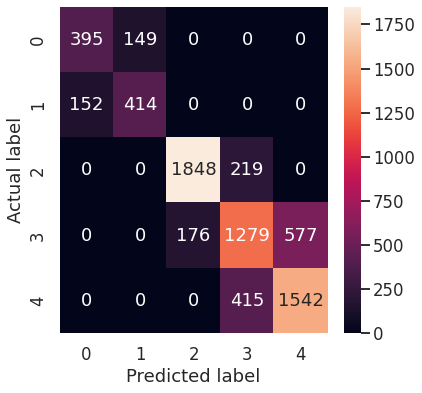

In [127]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [128]:
y_valid = xgb.predict(X_validation)
print(y_valid)


[3 3 4 ... 5 4 3]


In [129]:
client_score = pd.DataFrame(y_valid,columns=['churn_risk_score'])
client_score

,churn_risk_score
0,3
1,3
2,4
3,3
4,4
...,...
19914,3
19915,5
19916,5
19917,4


In [130]:
df_test_raw = pd.read_csv('test.csv')

In [131]:
df_pr = pd.DataFrame(df_test_raw['customer_id'],columns=['customer_id'])
df_pr

,customer_id
0,fffe43004900440031003700300030003400
1,fffe43004900440031003900370037003300
2,fffe43004900440034003800360037003000
3,fffe43004900440036003200370033003400
4,fffe43004900440035003000370031003900
...,...
19914,fffe43004900440035003600330037003800
19915,fffe43004900440032003900370037003100
19916,fffe43004900440036003100310036003700
19917,fffe43004900440034003200330033003600


In [132]:
df_pr = pd.concat([df_pr,client_score],axis=1)

In [133]:
df_pr

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,4
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,4
...,...,...
19914,fffe43004900440035003600330037003800,3
19915,fffe43004900440032003900370037003100,5
19916,fffe43004900440036003100310036003700,5
19917,fffe43004900440034003200330033003600,4


In [134]:
df_pr.to_csv('Churn_risk_final_submission_2.csv')

In [135]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=25)

rf.fit(X_over,Y_over)
y_pred = rf.predict(X_over_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))
print(f"F1-score :{f1_score(y_true=y_test,y_pred=y_pred,average='macro')}")


              precision    recall  f1-score   support

           1       0.74      0.73      0.74       544
           2       0.75      0.75      0.75       566
           3       0.90      0.90      0.90      2067
           4       0.76      0.52      0.61      2032
           5       0.70      0.93      0.80      1957

    accuracy                           0.78      7166
   macro avg       0.77      0.77      0.76      7166
weighted avg       0.78      0.78      0.77      7166

0.7599356282557391
F1-score :0.7599356282557391


In [136]:
from sklearn.metrics import accuracy_score
print(f"Accuracy :{accuracy_score(y_true=y_test,y_pred=y_pred)}")

Accuracy :0.7760256768071448


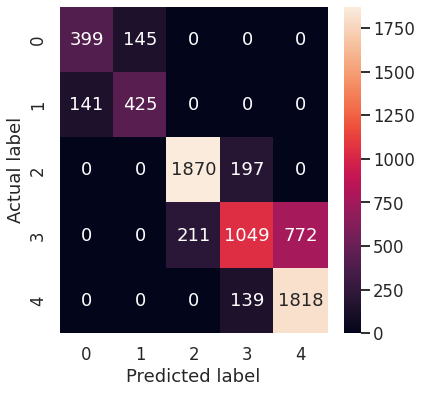

In [137]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [138]:
y_valid = rf.predict(X_validation)
# print(y_valid)

client_score = pd.DataFrame(y_valid,columns=['churn_risk_score'])
# client_score

df_test_raw = pd.read_csv('test.csv')

df_pr = pd.DataFrame(df_test_raw['customer_id'],columns=['customer_id'])
# df_pr

df_pr = pd.concat([df_pr,client_score],axis=1)

df_pr.to_csv('Churn_risk_final_submission_RF_2.csv')

## **Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=1000,max_depth=25)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           1       0.87      0.91      0.89      1572
           2       0.91      0.86      0.88      1543
           3       0.89      0.92      0.90      1582
           4       0.79      0.52      0.63      1577
           5       0.72      0.94      0.81      1557

    accuracy                           0.83      7831
   macro avg       0.83      0.83      0.82      7831
weighted avg       0.83      0.83      0.82      7831

0.8238306920173439


## **XGBoost**

### **Hyperparameter Tuning**

In [ ]:
def hyperParameterTuning(X_train, y_train):
    # param_tuning = {
    #     'learning_rate': [0.05, 0.1],
    #     'max_depth': [3, 5, 7, 10],
    #     'min_child_weight': [1, 3, 5],
    #     'subsample': [0.5, 0.7],
    #     'colsample_bytree': [0.5, 0.7],
    #     'n_estimators' : [100, 500, 1000],
    #     'objective': ['reg:squarederror'],
    #     'tree_method' : ['gpu_hist']
    # }
    param_tuning = {
        # 'learning_rate': [0.05, 0.1],
        'learning_rate': [0.05],
        'max_depth': [10, 15],
        # 'min_child_weight': [1, 5],
        # 'subsample': [0.5, 0.7],
        # 'colsample_bytree': [0.5, 0.7],
        # 'n_estimators' : [500, 1000],
        'n_estimators' : [ 1000],
        'objective': ['multi:softmax'],
        'tree_method' : ['gpu_hist'],
        'predictor' : ['gpu_predictor'],
        'num_class' : [5]
    }
    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                   
                           scoring = 'accuracy',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 80)

    gsearch.fit(X_train,y_train,early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

    return gsearch.best_params_
   
    pass

In [ ]:
hyperParameterTuning(X_over, Y_over)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'learning_rate': 0.05,
 'max_depth': 15,
 'n_estimators': 1000,
 'num_class': 5,
 'objective': 'multi:softmax',
 'predictor': 'gpu_predictor',
 'tree_method': 'gpu_hist'}

### **XGB Train**

In [ ]:
xgb = XGBClassifier(tree_method ='gpu_hist' , predictor = 'gpu_predictor',  n_jobs=-1,n_estimators=1000,max_depth=15)
# xgb = XGBClassifier(n_jobs=-1,n_estimators=1000,max_depth=10)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           1       0.90      0.94      0.92      1524
           2       0.95      0.90      0.92      1649
           3       0.90      0.92      0.91      1547
           4       0.71      0.63      0.67      1544
           5       0.76      0.82      0.79      1567

    accuracy                           0.84      7831
   macro avg       0.84      0.84      0.84      7831
weighted avg       0.84      0.84      0.84      7831

0.8422995748502867


## **KNN**

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))

              precision    recall  f1-score   support

           1       0.77      0.87      0.82      2019
           2       0.78      0.84      0.81      2105
           3       0.68      0.62      0.65      2078
           4       0.49      0.42      0.45      2091
           5       0.68      0.70      0.69      2131

    accuracy                           0.69     10424
   macro avg       0.68      0.69      0.68     10424
weighted avg       0.68      0.69      0.68     10424

0.6825595373945635


In [ ]:
y_valid = model_knn.predict(X_validation)
# print(y_valid)

client_score = pd.DataFrame(y_valid,columns=['churn_risk_score'])
# client_score

df_test_raw = pd.read_csv('test.csv')

df_pr = pd.DataFrame(df_test_raw['customer_id'],columns=['customer_id'])
# df_pr

df_pr = pd.concat([df_pr,client_score],axis=1)

df_pr.to_csv('Churn_risk_final_submission_KNN.csv')

## **SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
# Create the SVM model, all parameters not specified are set to their defaults
model = SVC(kernel = 'linear', random_state = 0)

# Fitting the model
clf = model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of SVM model is', accuracy)

In [ ]:
#confusion matrix
#cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='Greens', cbar=False, xticklabels=labels, yticklabels=labels,
            fmt="d", annot_kws={"fontsize": 15})
plt.title(f'Test score: {cv_accuracy:.3f}', fontsize=14)
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
# Create the SVM model, all parameters not specified are set to their defaults
model_svm = SVC(kernel = 'rbf')
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_test)
print(f"Report Metrics SVM \n {classification_report(y_test, y_pred)}")
print(f"Confusion Matrix SVM \n {confusion_matrix(y_test, y_pred)}")
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))
print(accuracy_score(y_true=y_test,y_pred=y_pred))

Report Metrics SVM 
               precision    recall  f1-score   support

           1       0.60      0.96      0.74      2019
           2       0.92      0.38      0.54      2105
           3       0.78      0.75      0.76      2078
           4       0.55      0.32      0.40      2091
           5       0.67      1.00      0.80      2131

    accuracy                           0.68     10424
   macro avg       0.71      0.68      0.65     10424
weighted avg       0.71      0.68      0.65     10424

Confusion Matrix SVM 
 [[1937   64    9    8    1]
 [1284  799   10    8    4]
 [   0    0 1551  520    7]
 [   0    0  405  661 1025]
 [   0    1    9    0 2121]]
0.6490629314667464
0.6781465848042978


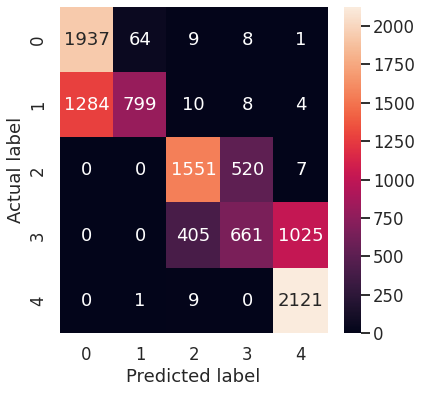

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot()
cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

In [ ]:
print(f1_score(y_true=y_test,y_pred=y_pred,average='macro'))
print(accuracy_score(y_true=y_test,y_pred=y_pred))

0.6490629314667464
0.6781465848042978


In [ ]:
svm_accuracy = accuracy_score(y_true=y_test,y_pred=y_pred)

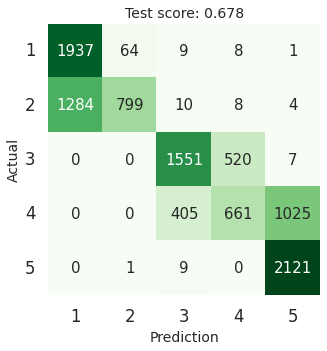

In [ ]:
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='Greens', cbar=False, xticklabels=labels, yticklabels=labels,
            fmt="d", annot_kws={"fontsize": 15})
plt.title(f'Test score: {svm_accuracy:.3f}', fontsize=14)
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

In [ ]:
y_valid = model_svm.predict(X_validation)
# print(y_valid)

client_score = pd.DataFrame(y_valid,columns=['churn_risk_score'])
# client_score

df_test_raw = pd.read_csv('test.csv')

df_pr = pd.DataFrame(df_test_raw['customer_id'],columns=['customer_id'])
# df_pr

df_pr = pd.concat([df_pr,client_score],axis=1)

df_pr.to_csv('Churn_risk_final_submission_SVM.csv')

**Also try:**
*   **No Drop Negative**
*   **One-vs-Rest**